# Classification Visualization

In [22]:
#| label: load_dataset
#| code-fold: false

# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn import datasets

# import the iris dataset
iris = datasets.load_iris()
print(iris.DESCR)
X = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Linear Classification

### Support Vector Machine



In [23]:
#| label: svm_model
#| code-fold: false
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model on linear kernel
from sklearn import svm
svm_clf = svm.SVC(kernel='linear')  # Linear Kernel
# train the model
svm_clf.fit(X_train_scaled, y_train)
# make predictions
svm_clf_pred = svm_clf.predict(X_test_scaled)



## Nonlinear Classification

### Naive Bayes


In [24]:
#| label: nb_model
#| code-fold: false
from sklearn.naive_bayes import GaussianNB
# Create an NB model
gnb = GaussianNB()
# train the model
gnb.fit(X_train, y_train)
# make predictions
gnb_pred = gnb.predict(X_test)


###  Decision Tree Classifier

In [25]:
#| label: dtc_model
#| code-fold: false

from sklearn.tree import DecisionTreeClassifier

# Create an DTC model
dt = DecisionTreeClassifier(random_state=42)
# train the model
dt.fit(X_train, y_train)
# make predictions
dt_pred = dt.predict(X_test)

## Performance

In [26]:
#| label: performance
#| code-fold: false
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_clf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
gnb_accuracy = accuracy_score(y_test, gnb_pred)

# Create a DataFrame for classification reports
classification_reports = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1-score'])

# Classification Report for SVM
svm_classification_report = classification_report(y_test, svm_clf_pred, output_dict=True)
svm_metrics = [svm_accuracy, svm_classification_report['0']['precision'], svm_classification_report['0']['recall'], svm_classification_report['0']['f1-score']]
classification_reports.loc['Support Vector Machine'] = svm_metrics

# Classification Report for Decision Tree
tree_classification_report = classification_report(y_test, dt_pred, output_dict=True)
tree_metrics = [dt_accuracy, tree_classification_report['0']['precision'], tree_classification_report['0']['recall'], tree_classification_report['0']['f1-score']]
classification_reports.loc['Decision Tree'] = tree_metrics

# Classification Report for Naive Bayes
nb_classification_report = classification_report(y_test, gnb_pred, output_dict=True)
nb_metrics = [gnb_accuracy, nb_classification_report['0']['precision'], nb_classification_report['0']['recall'], nb_classification_report['0']['f1-score']]
classification_reports.loc['Naive Bayes'] = nb_metrics

# Display the DataFrame
print(classification_reports)


               accuracy  precision  recall  f1-score
SVM            0.966667        1.0     1.0       1.0
Decision Tree  1.000000        1.0     1.0       1.0
Naive Bayes    1.000000        1.0     1.0       1.0


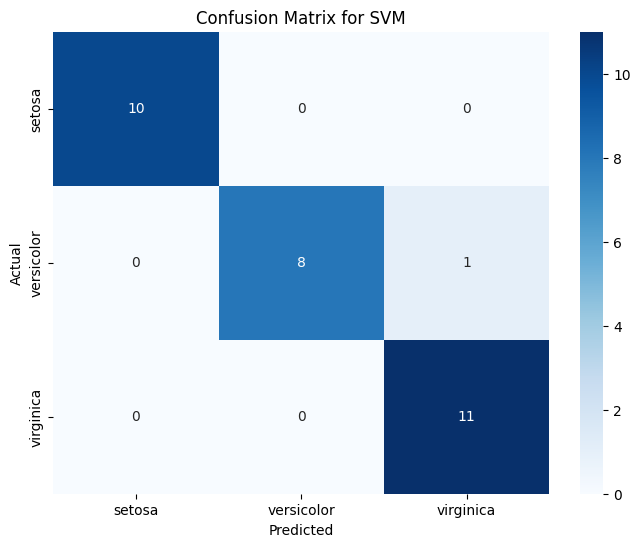

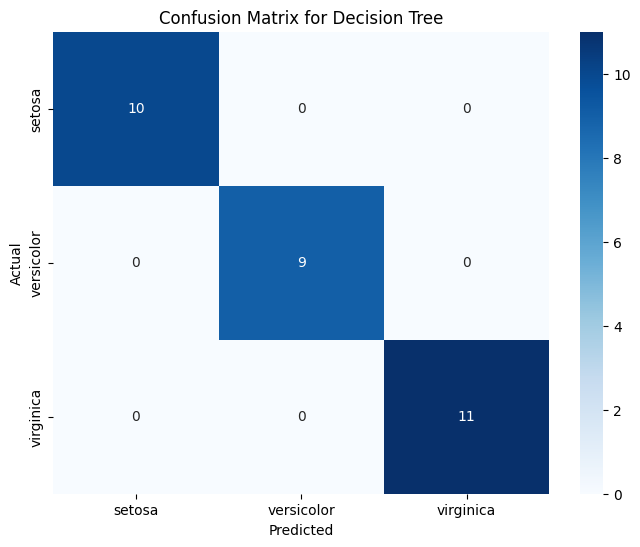

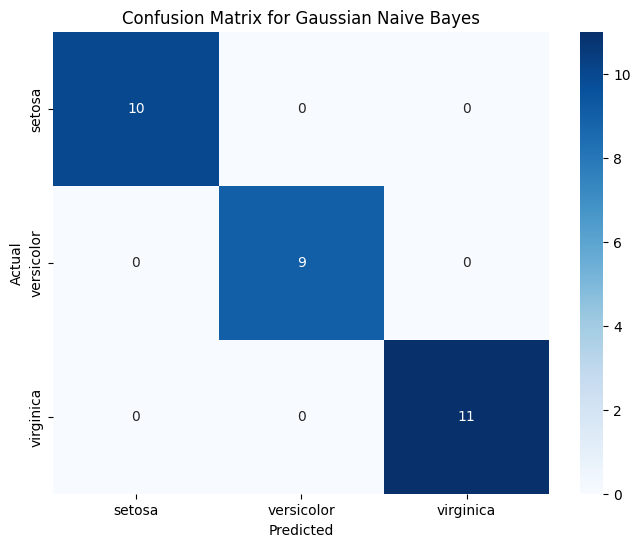

In [27]:
#| label: conf_matrix
#| code-fold: false

from sklearn.metrics import confusion_matrix

# Confusion Matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_clf_pred)

# Confusion Matrix for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_pred)

# Confusion Matrix for Naive Bayes
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)

# Plot Confusion Matrices
import matplotlib.pyplot as plt
import seaborn as sns

labels = iris.target_names

# SVM Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Naive Bayes Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gnb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()